<a href="https://colab.research.google.com/github/arun4589/Kaggle_competition/blob/main/spaceship_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arun4545","key":"d7f43d352032462a540c4afd72d63bff"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c spaceship-titanic

100% 299k/299k [00:00<00:00, 890kB/s]
100% 299k/299k [00:00<00:00, 888kB/s]


In [4]:
!unzip spaceship-titanic.zip

Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('train.csv')

In [7]:
df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


#EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
df.shape

(8693, 14)

In [10]:
df.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [11]:
df.duplicated().sum()

0

In [12]:
df['HomePlanet'].value_counts()

,count
HomePlanet,
Earth,4602
Europa,2131
Mars,1759


In [13]:
df['CryoSleep'].value_counts()

,count
CryoSleep,
False,5439
True,3037


In [ ]:
df['Destination'].value_counts()

,count
Destination,
TRAPPIST-1e,5915
55 Cancri e,1800
PSO J318.5-22,796


In [ ]:
df['VIP'].value_counts()

,count
VIP,
False,8291
True,199


In [ ]:
df['Transported'].value_counts()

,count
Transported,
True,4378
False,4315


<Axes: xlabel='RoomService', ylabel='Density'>

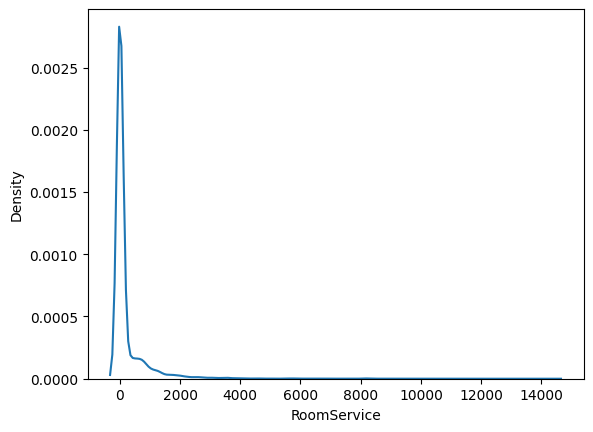

In [ ]:
sns.kdeplot(df['RoomService'])

<Axes: xlabel='FoodCourt', ylabel='Density'>

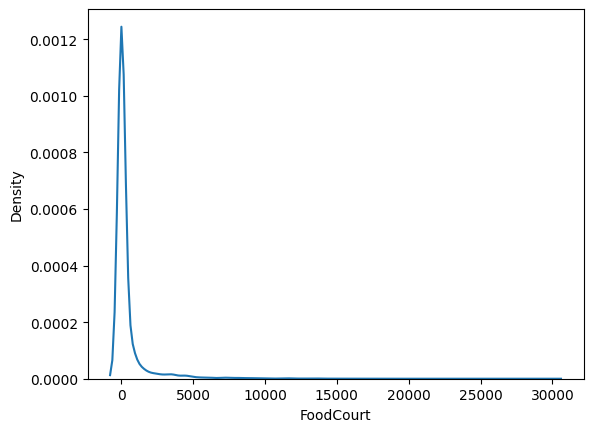

In [ ]:
sns.kdeplot(df['FoodCourt'])

<Axes: xlabel='ShoppingMall', ylabel='Density'>

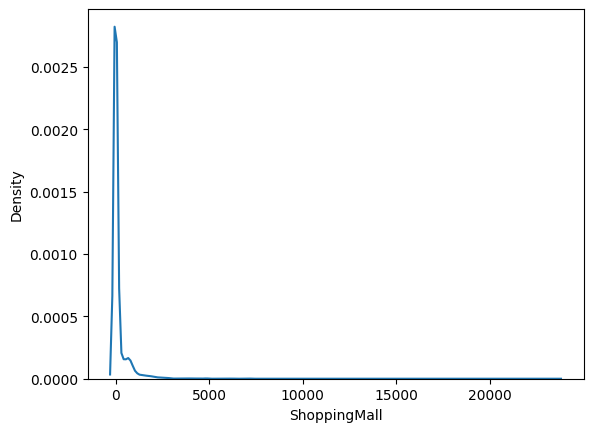

In [ ]:
sns.kdeplot(df['ShoppingMall'])

<Axes: xlabel='Spa', ylabel='Density'>

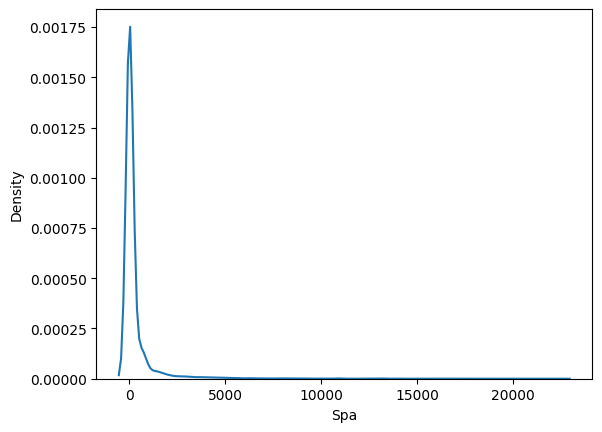

In [ ]:
sns.kdeplot(df['Spa'])

<Axes: xlabel='VRDeck', ylabel='Density'>

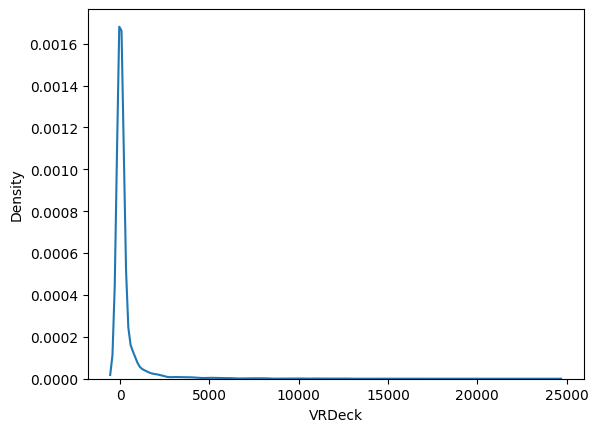

In [ ]:
sns.kdeplot(df['VRDeck'])

<Axes: xlabel='Transported', ylabel='RoomService'>

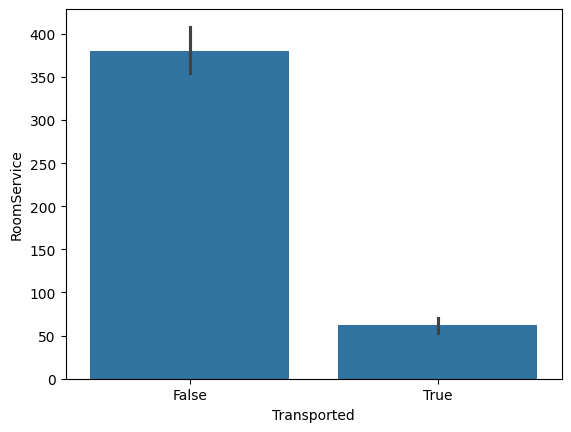

In [ ]:
sns.barplot(y=df['RoomService'],x=df['Transported'])

<Axes: xlabel='Transported', ylabel='VRDeck'>

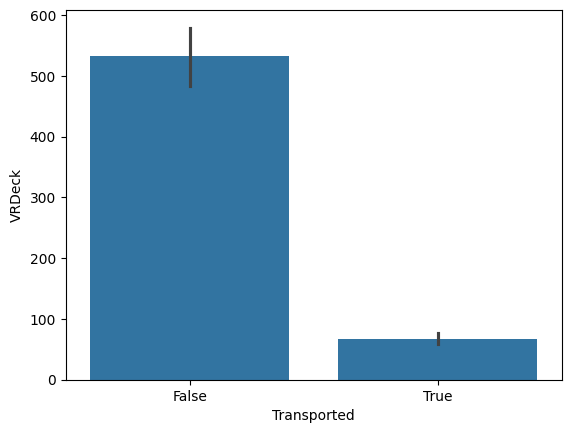

In [ ]:
sns.barplot(y=df['VRDeck'],x=df['Transported'])

<Axes: xlabel='Transported', ylabel='Spa'>

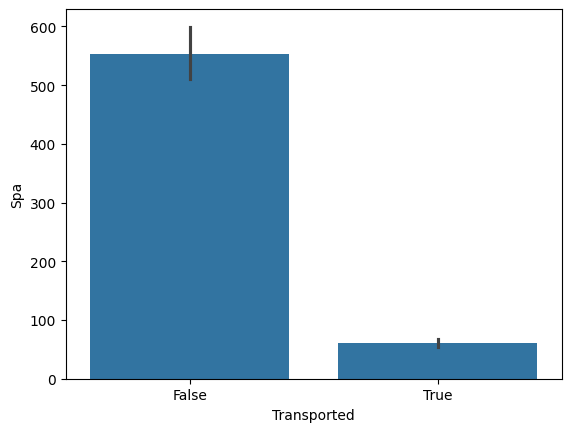

In [ ]:
sns.barplot(y=df['Spa'],x=df['Transported'])

<Axes: xlabel='Transported', ylabel='FoodCourt'>

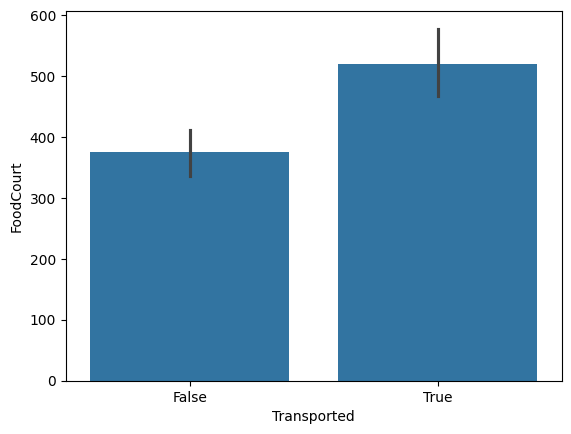

In [ ]:
sns.barplot(y=df['FoodCourt'],x=df['Transported'])

<Axes: xlabel='Transported', ylabel='ShoppingMall'>

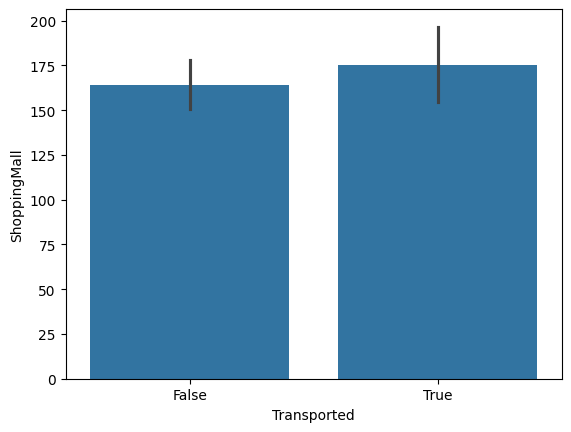

In [ ]:
sns.barplot(y=df['ShoppingMall'],x=df['Transported'])

<Axes: xlabel='Age', ylabel='Density'>

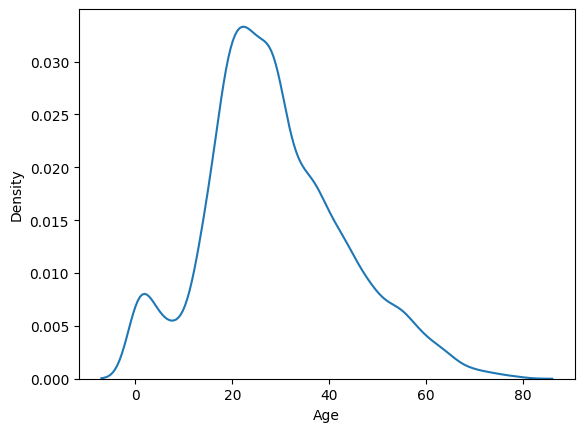

In [ ]:
sns.kdeplot(df['Age'])

<Axes: xlabel='Transported', ylabel='HomePlanet'>

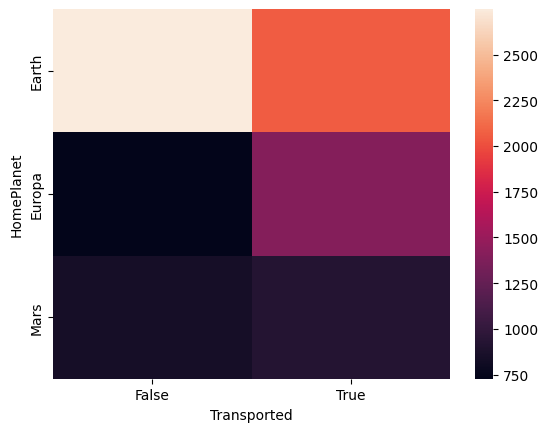

In [ ]:
sns.heatmap(pd.crosstab(df['HomePlanet'],df['Transported']))

<Axes: xlabel='Transported', ylabel='CryoSleep'>

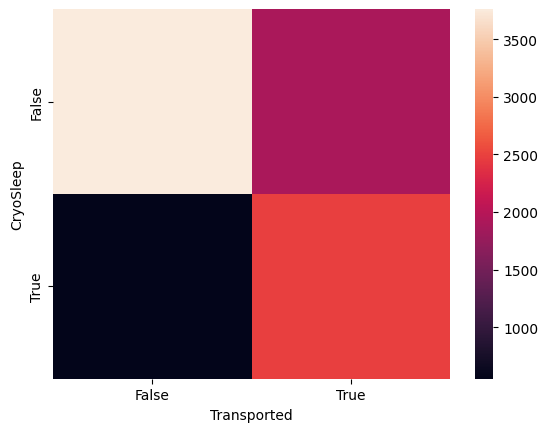

In [ ]:
sns.heatmap(pd.crosstab(df['CryoSleep'],df['Transported']))

#1

In [31]:
df['deck']=df['Cabin'].str.split('/').str[0]
test['deck']=test['Cabin'].str.split('/').str[0]

In [33]:
df['num']=df['Cabin'].str.split('/').str[1]
test['num']=test['Cabin'].str.split('/').str[1]

In [32]:
df['port']=df['Cabin'].str.split('/').str[2]
test['port']=test['Cabin'].str.split('/').str[2]

In [14]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder ,StandardScaler,RobustScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split


In [20]:
df['RoomService']=df['RoomService'].fillna(df['RoomService'].median())
test['RoomService']=test['RoomService'].fillna(test['RoomService'].median())

In [21]:
df['FoodCourt']=df['FoodCourt'].fillna(df['FoodCourt'].median())
test['FoodCourt']=test['FoodCourt'].fillna(test['FoodCourt'].median())

In [22]:
df['ShoppingMall']=df['ShoppingMall'].fillna(df['ShoppingMall'].median())
test['ShoppingMall']=test['ShoppingMall'].fillna(test['ShoppingMall'].median())

In [23]:
df['Spa']=df['Spa'].fillna(df['Spa'].median())
test['Spa']=test['Spa'].fillna(test['Spa'].median())

In [24]:
df['VRDeck']=df['VRDeck'].fillna(df['VRDeck'].median())
test['VRDeck']=test['VRDeck'].fillna(test['VRDeck'].median())

In [25]:
df['Age']=df['Age'].fillna(df['Age'].mean())
test['Age']=test['Age'].fillna(test['Age'].mean())

In [26]:
df['HomePlanet']=df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
test['HomePlanet']=test['HomePlanet'].fillna(test['HomePlanet'].mode()[0])

In [27]:
df['CryoSleep']=df['CryoSleep'].fillna(df['CryoSleep'].mode()[0])
test['CryoSleep']=test['CryoSleep'].fillna(test['CryoSleep'].mode()[0])

<ipython-input-27-12952a0331ac>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CryoSleep']=df['CryoSleep'].fillna(df['CryoSleep'].mode()[0])
<ipython-input-27-12952a0331ac>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['CryoSleep']=test['CryoSleep'].fillna(test['CryoSleep'].mode()[0])


In [28]:
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])
test['Cabin']=test['Cabin'].fillna(test['Cabin'].mode()[0])
df['Destination']=df['Destination'].fillna(df['Destination'].mode()[0])
test['Destination']=test['Destination'].fillna(test['Destination'].mode()[0])

In [29]:
df['VIP']=df['VIP'].fillna(df['VIP'].mode()[0])
test['VIP']=test['VIP'].fillna(test['VIP'].mode()[0])

<ipython-input-29-380ae3623171>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VIP']=df['VIP'].fillna(df['VIP'].mode()[0])
<ipython-input-29-380ae3623171>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['VIP']=test['VIP'].fillna(test['VIP'].mode()[0])


In [34]:
df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,port,num
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S,0


In [35]:
encoder=LabelEncoder()
df['Transported']=encoder.fit_transform(df['Transported'])

In [36]:
y=df['Transported']

In [37]:
x=df.drop(columns=['Transported','PassengerId','Cabin','Name'],axis=1)
test=test.drop(columns=['PassengerId','Cabin','Name'],axis=1)

In [38]:
test.shape

(4277, 13)

In [39]:
test.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,port,num
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,S,3
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,S,4


In [40]:
x.shape,y.shape

((8693, 13), (8693,))

In [41]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

In [42]:
num_p=Pipeline(steps=[

    ('scaler',RobustScaler())
])
cat_p=Pipeline(steps=[

    ('encoder',OneHotEncoder(sparse_output=True,drop='first',handle_unknown='ignore'))
])


In [43]:
processor=ColumnTransformer(
    transformers=[
        ('num',num_p,['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','num']),
        ('cat',cat_p,['HomePlanet','CryoSleep','Destination','VIP','deck','port'])
    ],remainder='passthrough'

)

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
x_test.shape,x_train.shape

((1739, 13), (6954, 13))

In [46]:
x_train=processor.fit_transform(x_train)
x_test=processor.transform(x_test)

In [47]:
test=processor.transform(test)

In [48]:
test.shape

(4277, 21)

In [49]:
x_train.shape

(6954, 21)

#DL

In [50]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax,Nadam,Adagrad,Adadelta
from tensorflow.keras.regularizers import l1,l2



In [51]:
model=Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(128,activation='relu',kernel_regularizer=l2(0.01),kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu',kernel_regularizer=l2(0.01),kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu',kernel_regularizer=l2(0.01),kernel_initializer='he_uniform'))
# model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))



In [103]:
model.compile(optimizer=SGD(learning_rate=0.001,momentum=0.9,nesterov=True),loss='binary_crossentropy',metrics=['accuracy'])

In [104]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,081 (55.00 KB)

 Trainable params: 13,633 (53.25 KB)

 Non-trainable params: 448 (1.75 KB)

In [105]:
history=model.fit(x_train,y_train,epochs=200,validation_data=(x_test,y_test),callbacks=[EarlyStopping(patience=10)],batch_size=64)

Epoch 1/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7928 - loss: 0.4318 - val_accuracy: 0.7953 - val_loss: 0.4277
Epoch 2/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7920 - loss: 0.4246 - val_accuracy: 0.7832 - val_loss: 0.4407
Epoch 3/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8074 - loss: 0.4263 - val_accuracy: 0.7867 - val_loss: 0.4375
Epoch 4/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7914 - loss: 0.4356 - val_accuracy: 0.7970 - val_loss: 0.4267
Epoch 5/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7942 - loss: 0.4395 - val_accuracy: 0.7982 - val_loss: 0.4272
Epoch 6/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7914 - loss: 0.4244 - val_accuracy: 0.7936 - val_loss: 0.4321
Epoch 7/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8069 - loss: 0.4236 - val_accuracy: 0.7901 - val_loss: 0.4311
Epoch 8/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8005 - loss: 0.4284 - val_acc

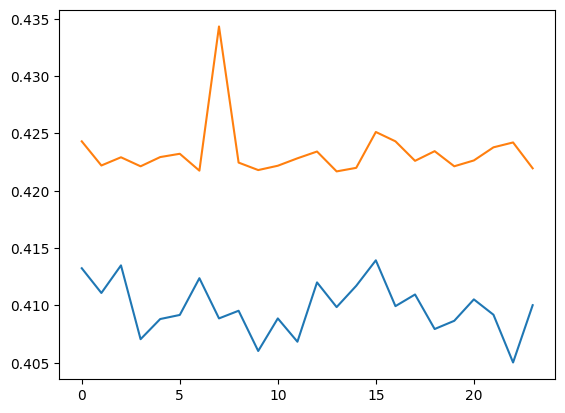

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


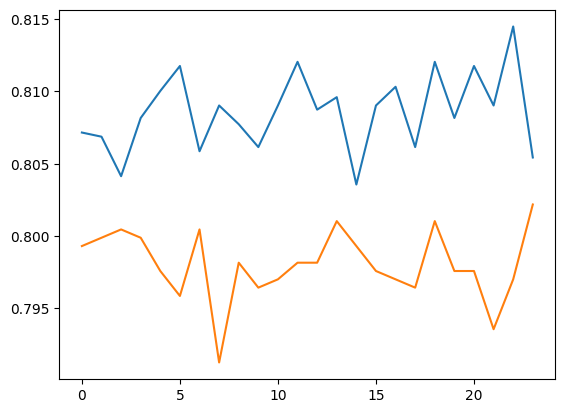

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

#keras tuner implementation

In [108]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.1 MB/s eta 0:00:00


In [110]:
import keras_tuner as kt
from kerastuner.tuners import RandomSearch,BayesianOptimization,Hyperband

In [112]:
def build_model(hp):
  model1=Sequential()
  model1.add(Input(shape=(x_train.shape[1],)))
  for i in range(hp.Int('layers',min_value=1,max_value=5,step=1)):


    model1.add(Dense(
        units=hp.Int('units_'+str(i),min_value=32,max_value=128,step=16),
        activation=hp.Choice('activation_'+str(i),values=['relu','selu','elu']),
        kernel_regularizer=l2(hp.Choice('l2_reg_'+str(i),[0.01,0.001,0.0001])),
        kernel_initializer='he_uniform'
    ))
    model1.add(Dropout(hp.Float('dropout_'+str(i),min_value=0,max_value=0.5,step=0.1)))
    model1.add(BatchNormalization())
  model1.add(Dense(1,activation='sigmoid'))
  optimizer=hp.Choice('optimizer',values=['adam','sgd','rmsprop'])
  learning_rate=hp.Float('learning_rate',1e-4,1e-2,sampling='log')
  if optimizer=='adam':
    opt=Adam(learning_rate=learning_rate)
  elif optimizer == 'sgd':
    opt = SGD(learning_rate=learning_rate, momentum=hp.Float('momentum', 0.0, 0.9, step=0.1), nesterov=True)
  else:
    opt = RMSprop(learning_rate=learning_rate)
  model1.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model1


In [113]:
tuner=RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='intro_to_kt'
)

In [114]:
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=5)])

Trial 5 Complete [00h 00m 29s]
val_accuracy: 0.7860839366912842

Best val_accuracy So Far: 0.7935594916343689
Total elapsed time: 00h 01m 59s


In [115]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps}")

Best Hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7e5b56b5e1d0>


In [116]:
tuner.get_best_models()[0].summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 80)                  │           5,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 80)                  │             320 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 80)                  │           6,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 80)                  │             320 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 48)                  │           3,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 48)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 48)                  │             192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              49 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,113 (70.75 KB)

 Trainable params: 17,569 (68.63 KB)

 Non-trainable params: 544 (2.12 KB)

In [117]:
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=10)], batch_size=64)

Epoch 1/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6455 - loss: 3.2895 - val_accuracy: 0.7769 - val_loss: 2.6838
Epoch 2/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7512 - loss: 2.6192 - val_accuracy: 0.7821 - val_loss: 2.1882
Epoch 3/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7587 - loss: 2.1361 - val_accuracy: 0.7826 - val_loss: 1.8123
Epoch 4/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7687 - loss: 1.7710 - val_accuracy: 0.7838 - val_loss: 1.5161
Epoch 5/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7815 - loss: 1.4858 - val_accuracy: 0.7803 - val_loss: 1.2918
Epoch 6/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7865 - loss: 1.2562 - val_accuracy: 0.7757 - val_loss: 1.1302
Epoch 7/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7793 - loss: 1.1041 - val_accuracy: 0.7683 - val_loss: 0.9991
Epoch 8/200
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7876 - loss: 0.9665 - val_accu

In [118]:
tuner.get_best_hyperparameters()[0].values

{'layers': 4,
 'units_0': 64,
 'activation_0': 'selu',
 'l2_reg_0': 0.0001,
 'dropout_0': 0.2,
 'optimizer': 'adam',
 'learning_rate': 0.0005366200183488957,
 'units_1': 80,
 'activation_1': 'selu',
 'l2_reg_1': 0.01,
 'dropout_1': 0.0,
 'units_2': 80,
 'activation_2': 'relu',
 'l2_reg_2': 0.001,
 'dropout_2': 0.30000000000000004,
 'units_3': 48,
 'activation_3': 'relu',
 'l2_reg_3': 0.01,
 'dropout_3': 0.2,
 'units_4': 96,
 'activation_4': 'elu',
 'l2_reg_4': 0.0001,
 'dropout_4': 0.1}

#--

In [97]:
y_pred=model.predict(x_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [98]:
y_pred=np.where(y_pred>0.5,1,0)

In [79]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [99]:
accuracy_score(y_test,y_pred)

0.7981598619896493

In [89]:
pred=np.where(model.predict(test)>0.5,1,0)

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [90]:
sub=pd.DataFrame({'PassengerId':ps,'Transported':pred.reshape(-1)})

In [91]:
sub.head()

,PassengerId,Transported
0,0013_01,0
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [92]:
sub['Transported']=sub['Transported'].map({0:'False',1:'True'})

In [93]:
sub.to_csv('submission.csv',index=False)

In [16]:
test=pd.read_csv('test.csv')

In [17]:
ps=test['PassengerId']

In [18]:
test.shape

(4277, 13)

In [19]:
test.isnull().sum()


,0
PassengerId,0
HomePlanet,87
CryoSleep,93
Cabin,100
Destination,92
Age,91
VIP,93
RoomService,82
FoodCourt,106
ShoppingMall,98


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


#ML

In [ ]:
!pip install catboost
!pip install dask[dataframe]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 17.4 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier



In [ ]:
rf=RandomForestClassifier(n_estimators=100,max_features=0.5,max_samples=0.2)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
accuracy_score(y_test,y_pred_rf)


0.7941345600920069

In [ ]:
gb=GradientBoostingClassifier(n_estimators=300,learning_rate=0.01,max_depth=3,max_features=0.4)
gb.fit(x_train,y_train)
y_pred_gb=gb.predict(x_test)
accuracy_score(y_test,y_pred_gb)

0.7832087406555491

In [ ]:
xg=XGBClassifier(n_estimators=300,learning_rate=0.01)
xg.fit(x_train,y_train)
y_pred_xg=xg.predict(x_test)
accuracy_score(y_test,y_pred_xg)

0.7952846463484762

In [ ]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
y_pred_svc=svc.predict(x_test)
accuracy_score(y_test,y_pred_svc)

0.7745830937320299

In [ ]:
lgb=LGBMClassifier(n_estimators=200,learning_rate=0.1)
lgb.fit(x_train,y_train)
y_pred_lgb=lgb.predict(x_test)
accuracy_score(y_test,y_pred_lgb)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1380
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.7964347326049454

In [ ]:
cat=CatBoostClassifier(n_estimators=200,learning_rate=0.1)
cat.fit(x_train,y_train)
y_pred_cat=cat.predict(x_test)
accuracy_score(y_test,y_pred_cat)

0:	learn: 0.6417533	total: 9.45ms	remaining: 1.88s
1:	learn: 0.6079980	total: 18.8ms	remaining: 1.86s
2:	learn: 0.5827361	total: 28.9ms	remaining: 1.9s
3:	learn: 0.5522224	total: 38.3ms	remaining: 1.88s
4:	learn: 0.5358663	total: 47.9ms	remaining: 1.87s
5:	learn: 0.5208646	total: 59.4ms	remaining: 1.92s
6:	learn: 0.5062677	total: 67.2ms	remaining: 1.85s
7:	learn: 0.4945559	total: 86.9ms	remaining: 2.09s
8:	learn: 0.4851229	total: 98.6ms	remaining: 2.09s
9:	learn: 0.4758686	total: 110ms	remaining: 2.1s
10:	learn: 0.4687218	total: 116ms	remaining: 2s
11:	learn: 0.4629547	total: 126ms	remaining: 1.97s
12:	learn: 0.4574802	total: 135ms	remaining: 1.94s
13:	learn: 0.4520935	total: 145ms	remaining: 1.92s
14:	learn: 0.4477648	total: 154ms	remaining: 1.9s
15:	learn: 0.4436686	total: 164ms	remaining: 1.89s
16:	learn: 0.4395285	total: 167ms	remaining: 1.8s
17:	learn: 0.4369346	total: 172ms	remaining: 1.74s
18:	learn: 0.4345725	total: 176ms	remaining: 1.67s
19:	learn: 0.4303503	total: 180ms	remai

0.7964347326049454

In [ ]:
lr=LogisticRegression(max_iter=600)
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
accuracy_score(y_test,y_pred_lr)

0.7837837837837838

In [ ]:
pred=cat.predict(test)